In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus as pdot
from IPython.display import Image
df = pd.read_csv(r'/content/GermanCredit.csv')
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,... < 100 DM,6,critical account/other credits existing,domestic appliances,1169,unknown/no savings account,... >= 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee/official,1,yes,yes,1
1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee/official,1,no,yes,0
2,no checking account,12,critical account/other credits existing,retraining,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,no,yes,1
3,... < 100 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee/official,2,no,yes,1
4,... < 100 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,...,unknown/no property,53,none,for free,2,skilled employee/official,2,no,yes,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

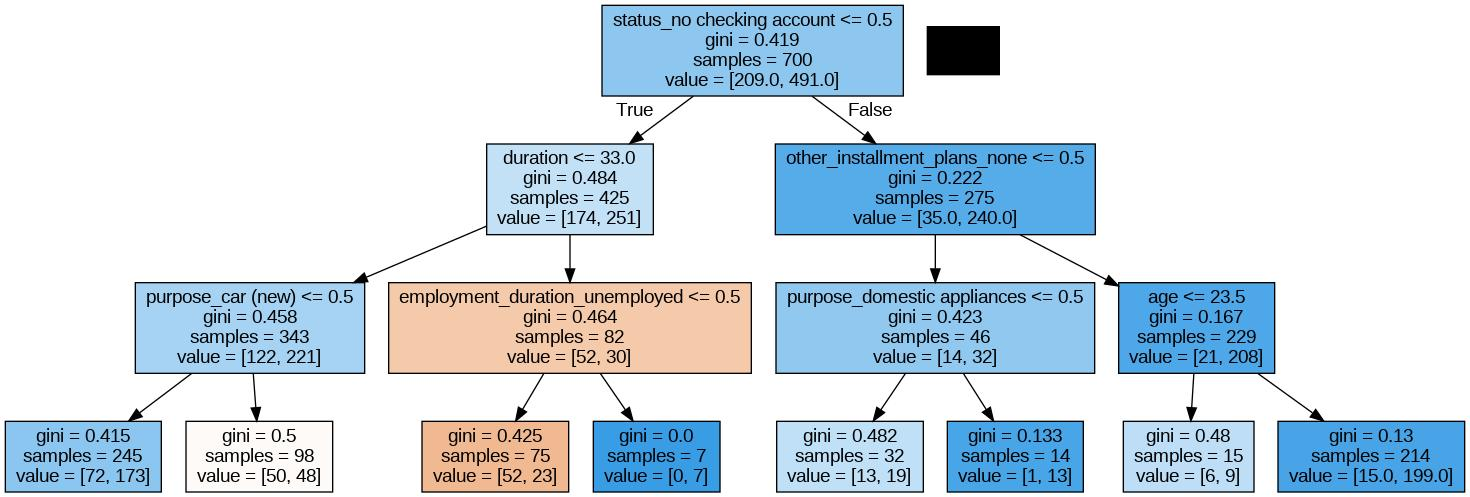

In [4]:
y = df['credit_risk']
X = pd.get_dummies(df.drop(['credit_risk'], axis = 1), drop_first = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3).fit(X_train, y_train)
# Export the tree into odt file
export_graphviz(clf_tree, out_file = "chd_tree.odt", feature_names = X.columns, filled = True)
# Read the create the image file
chd_tree_graph = pdot.graphviz.graph_from_dot_file('chd_tree.odt')
chd_tree_graph.write_jpg('chd_tree.png')
# Render the png file
Image(filename = 'chd_tree.png')

In [5]:
from sklearn.model_selection import GridSearchCV
tuned_parameters=[{'criterion':['gini','entropy'],'max_depth':range(2,10)}]
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc').fit(X_train,y_train)
print(clf.best_score_)
print(clf.best_params_)

0.7011918853255588
{'criterion': 'gini', 'max_depth': 6}
